# HATE SPEECH DETECTION IN HINDI-ENGLISH CODE MIXED DATA

## $\color{yellow}{\text{I. Classical Embedding Techniques (Word2Vec, Doc2Vec, fastText applied to:}}$
#### $\color{yellow}{\text{Classical Machine Learning Algorithms (SVM, Logistic Regression and Random Forest)}}$
#### $\color{yellow}{\text{Neural Network Models (Conv1D, LSTM, RNN, Bi-LSTM)}}$

## $\color{yellow}{\text{II. Transformers}}$
#### $\color{yellow}{\text{Transformers with Multihead Attention Mechanism}}$
#### $\color{yellow}{\text{Encoder-Decoder Model}}$
#### $\color{yellow}{\text{Encoder-Decoder model with Bahdanau's Attention Mechanism}}$



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import tensorflow_hub as hub

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
# from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [7]:
import sklearn

In [ ]:
dataset = pd.read_excel("Hate_speech_data.xlsx")
dataset.head()

,"Knowing ki Vikas kitna samjhata hai Priyanka aur Itch Guard Luv ko, usne bola tha Ben wali baat me ab Sallu ne bhi agree kiya!",no
0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,no
1,Doctor sab sahi me ke PhD in hate politics) w...,no
2,Poore Desh me Patel OBC me aate Hain sirf gujr...,no
3,Sarkar banne ke bad Hindu hit me ek bhi faisla...,yes
4,Hate it jab test ata ho phr bh acha na ho -.-,yes


In [ ]:
r1 = list(dataset.columns)
r1

['Knowing ki Vikas kitna samjhata hai Priyanka aur Itch Guard Luv ko, usne bola tha Ben wali baat me ab Sallu ne bhi agree kiya!',
 'no']

In [ ]:
dataset.rename(columns = {"Knowing ki Vikas kitna samjhata hai Priyanka aur Itch Guard Luv ko, usne bola tha Ben wali baat me ab Sallu ne bhi agree kiya!":"Statement",
                          "no":"label"}, inplace = True)

In [ ]:
dataset.loc[len(dataset.index)] = r1 # adding new datapoint at the end of dataset

In [ ]:
dataset.head()

,Statement,label
0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,no
1,Doctor sab sahi me ke PhD in hate politics) w...,no
2,Poore Desh me Patel OBC me aate Hain sirf gujr...,no
3,Sarkar banne ke bad Hindu hit me ek bhi faisla...,yes
4,Hate it jab test ata ho phr bh acha na ho -.-,yes


In [ ]:
# Preprocessing - removing unwanted character
def preprocess_data(input):
    user_name = '@[A-Za-z0-9]+' # Pattern for matching the user names in the tweet
    has_tag = '#[A-Za-z0-9]+' # Pattern for matching the hasgtags in the tweer
    url = 'https?:\/\/[A-Za-z0-9\.\/\-]+' # Pattern for matching the URLs in the tweet

    x = str(input).lower()

    x = re.sub(user_name, '', str(x)) # Replace the username with an empty characrer

    x = re.sub(has_tag,'',str(x)) # Replace the hashtags with an empty characrer

    x = re.sub(url, '', str(x)) # Replace the URLs with an empty characrer
    x = re.sub("[^a-zA-Z]", " ",str(x)) # Replace all the characters except alphabets with empty character
    x = re.sub("rt\s+",'',str(x)) # Replace the retweet character "rt" from the tweet

    return x

In [ ]:
dataset['Statement'] = dataset['Statement'].apply(lambda x: preprocess_data(x))
dataset.head()

,Statement,label
0,i am muhajir aur mere lye sab se pehly paki...,no
1,doctor sab sahi me ke phd in hate politics w...,no
2,poore desh me patel obc me aate hain sirf gujr...,no
3,sarkar banne ke bad hindu hit me ek bhi faisla...,yes
4,hate it jab test ata ho phr bh acha na ho,yes


In [ ]:
dataset.loc[len(dataset)-1]["Statement"]

'knowing ki vikas kitna samjhata hai priyanka aur itch guard luv ko  usne bola tha ben wali baat me ab sallu ne bhi agree kiya '

In [ ]:
dataset.isna().sum()

Statement    0
label        1
dtype: int64

In [ ]:
dataset.dropna(axis=0, inplace = True)

In [ ]:
dataset["label"].unique()

array(['no', 'yes'], dtype=object)

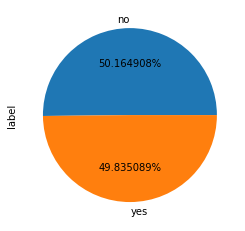

In [ ]:
dataset["label"].value_counts().plot(kind="pie", autopct="%f%%")

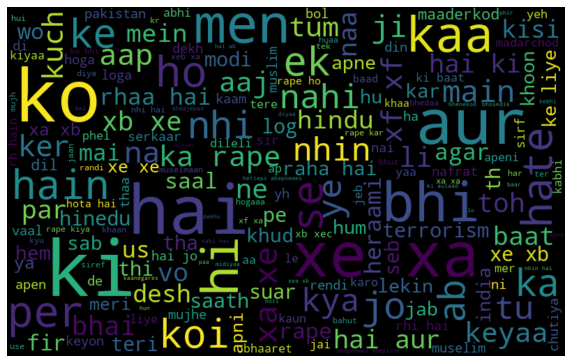

In [ ]:
# visualizing which word is most commonly used in the dataset
from wordcloud import WordCloud

all_words = ' '.join([text for text in dataset['Statement']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

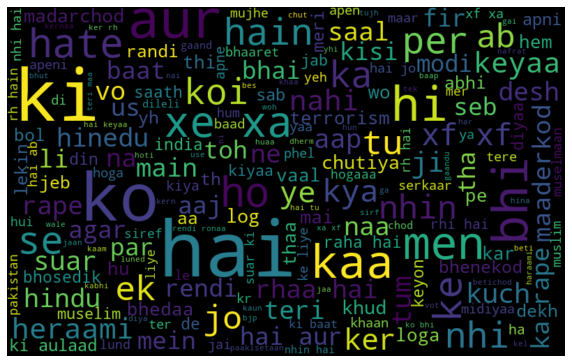

In [ ]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in dataset['Statement'][dataset['label'] == "yes"]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

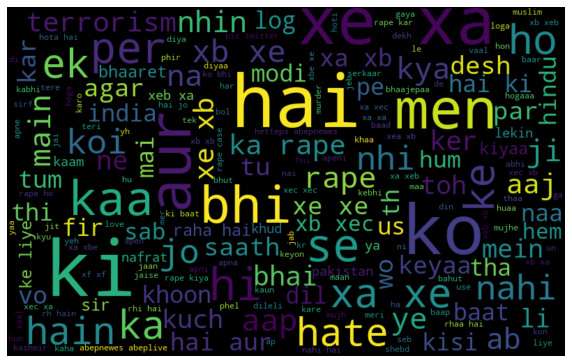

In [ ]:
# visualizing which of the word is most commonly used for non-hatred speech
non_hatred_words = ' '.join([text for text in dataset['Statement'][dataset['label'] == "no"]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(non_hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Converting the dataframe into list
Statement = dataset['Statement'].tolist()
output = dataset['label'].tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#labels = le.fit_transform(sentiment)
Y = le.fit_transform(output)

In [ ]:
words_in_Statement = [sentence.split() for sentence in Statement] # Splitting the tweet into tokens
words_in_Statement[0:5]

[['i',
  'am',
  'muhajir',
  'aur',
  'mere',
  'lye',
  'sab',
  'se',
  'pehly',
  'pakistan',
  'he',
  'agr',
  'lakh',
  'altaf',
  'jese',
  'leaders',
  'bh',
  'is',
  'zameen',
  'ki',
  'behurmati',
  'kren',
  'un',
  'sbko',
  'sar',
  'e',
  'aam',
  'phansi',
  'deni',
  'chahye',
  'proud',
  'to',
  'be',
  'a',
  'and'],
 ['doctor',
  'sab',
  'sahi',
  'me',
  'ke',
  'phd',
  'in',
  'hate',
  'politics',
  'wale',
  'bhai',
  'padhe',
  'likhe',
  'ho',
  'fir',
  'kyu',
  'ye',
  'sab',
  'baate',
  'karte',
  'ho',
  'tum',
  'bas',
  'bowling',
  'khelo',
  'aur',
  'maje',
  'lo',
  'pic',
  'twitter',
  'com',
  'fk',
  'qubqstw'],
 ['poore',
  'desh',
  'me',
  'patel',
  'obc',
  'me',
  'aate',
  'hain',
  'sirf',
  'gujrat',
  'ko',
  'chor',
  'kar',
  'may',
  'be',
  'ye',
  'manuwadiyon',
  'bramanwadi',
  'kabhi',
  'aapko',
  'aarackchan',
  'nahi',
  'denge',
  'ye',
  'to',
  'jis',
  'obc',
  'ko',
  'mila',
  'hai',
  'usse',
  'bhi',
  'nafrat',

# $\color{yellow}{\text{Classical Embedding Techniques -> Word2Vec, Doc2Vec and FastText}}$


# (A) Word2vec
# $\color{yellow}{\text{1. Applying Word2Vec on Logistic Regression, SVM and Random Forest}}$
# $\color{yellow}{\text{2. Applying Word2Vec on Neural Networks (Conv1D, RNN, LSTM, BI-LSTM)}}$


<img src = 'https://drive.google.com/uc?id=1bpnzY7_ZSYGkuTIGzT_rjl3_EnYuTt-z'>

In [ ]:
import gensim
from gensim.models import KeyedVectors, Word2Vec

wvmodel = Word2Vec( size=100, window=5, min_count=1, sg=1, workers=4)
wvmodel.build_vocab(sentences=words_in_Statement)
wvmodel.train(sentences=words_in_Statement, total_examples=len(words_in_Statement), epochs=10)  # train

(2305753, 2706390)

In [ ]:
X = np.zeros((len(words_in_Statement),100)) # Initializing the X matrix with zeros
for i in range(len(words_in_Statement)):
    emb = [wvmodel.wv[w] for w in words_in_Statement[i]] # Create a list of word embeddings of the words in each sentence
    X[i] = np.sum(emb, axis=0) # Compute the linear combination of the word embeddings to generate the sentence vector

In [ ]:
np.shape(X) # Print the size of the word vector matrix for the data

(12431, 100)

In [ ]:
# Splitting the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9944, 100) (9944,)
(2487, 100) (2487,)


## Logistic Regression

In [ ]:
def logistic_regression(X_train,y_train,X_test,y_test):
  # import logistic regression model
  from sklearn.linear_model import LogisticRegression

  # Create logistic regression classifier
  logreg = LogisticRegression()

  # Train the model using the training sets
  logreg.fit(X_train,y_train)

  # predict using testing data
  y_pred = logreg.predict(X_test)
  return y_pred

In [ ]:
def performance_metrics(y_pred,y_test):
  from sklearn.metrics import classification_report, confusion_matrix
  print("confusion matrix is\n")
  print(confusion_matrix(y_test,y_pred))
  print("\n")
  print(classification_report(y_test,y_pred))

In [ ]:
y_pred = logistic_regression(X_train,y_train,X_test,y_test)
performance_metrics(y_pred,y_test)

confusion matrix is

[[944 288]
 [402 853]]


              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1232
           1       0.75      0.68      0.71      1255

    accuracy                           0.72      2487
   macro avg       0.72      0.72      0.72      2487
weighted avg       0.72      0.72      0.72      2487



## SVM

In [ ]:
def linear_svm(X_train,y_train,X_test,y_test):
  #Import svm model
  from sklearn import svm

  #Create a svm Classifier
  clf = svm.SVC(kernel='linear') # linear Kernel

  # Train the model using the training sets
  clf.fit(X_train,y_train)

  # predict using testing data
  y_pred = clf.predict(X_test)
  return y_pred

In [ ]:
y_pred = linear_svm(X_train,y_train,X_test,Y)
performance_metrics(y_pred,y_test)

confusion matrix is

[[980 252]
 [438 817]]


              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1232
           1       0.76      0.65      0.70      1255

    accuracy                           0.72      2487
   macro avg       0.73      0.72      0.72      2487
weighted avg       0.73      0.72      0.72      2487



In [ ]:
def rbf_svm(X_train,y_train,X_test,y_test):
  #Import svm model
  from sklearn import svm

  #Create a svm Classifier
  clf = svm.SVC(kernel='rbf') # linear Kernel

  # Train the model using the training sets
  clf.fit(X_train,y_train)

  # predict using testing data
  y_pred = clf.predict(X_test)
  return y_pred

In [ ]:
y_pred = rbf_svm(X_train,y_train,X_test,Y)
performance_metrics(y_pred,y_test)

confusion matrix is

[[969 263]
 [433 822]]


              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1232
           1       0.76      0.65      0.70      1255

    accuracy                           0.72      2487
   macro avg       0.72      0.72      0.72      2487
weighted avg       0.72      0.72      0.72      2487



## Random Forest Classifier

In [ ]:
def randomforest(X_train,y_train,X_test,y_test):
  # import the classifier
  from sklearn.ensemble import RandomForestClassifier

  # create classifier object
  clf = RandomForestClassifier(n_estimators = 100, random_state = 10)

  # fit the classifier with x and y data
  clf.fit(X_train, y_train)

  # predict using testing data
  y_pred = clf.predict(X_test)
  return y_pred

In [ ]:
y_pred = randomforest(X_train,y_train,X_test,Y)
performance_metrics(y_pred,y_test)

confusion matrix is

[[950 282]
 [392 863]]


              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1232
           1       0.75      0.69      0.72      1255

    accuracy                           0.73      2487
   macro avg       0.73      0.73      0.73      2487
weighted avg       0.73      0.73      0.73      2487



# Neural Network
*   $\color{yellow}{\text{Tokenization of sentences}}$
*   $\color{yellow}{\text{Splitting the Dataset into training and testing set}}$
*   $\color{yellow}{\text{Assigning OOV Tokens}}$
*   $\color{yellow}{\text{Preparing embedding matrix to put in Embedding Layer}}$
*   $\color{yellow}{\text{Converting Text into Sequences}}$
*   $\color{yellow}{\text{Training the Neural Network (Conv1D, RNN, LSTM, BI-LSTM)}}$


*   $\color{yellow}{\text{Tokenization of sentences}}$


In [ ]:
sentence_corp = []
words = []

for sent in Statement:
  word = word_tokenize(sent)
  sentence_corp.append(word)
  for i in word:
    words.append(i)

print(sentence_corp[0:5])
print(words)


In [ ]:
vocab = set(words)
vocab_size = len(vocab)

*   $\color{yellow}{\text{Splitting the Dataset into training and testing set}}$


In [ ]:
training_Statement, test_Statement, tr_labels, te_labels = train_test_split(Statement, Y,
                                                                                test_size=0.20,
                                                                                random_state=42
                                                                                )

*   $\color{yellow}{\text{Assigning OOV Tokens}}$


In [ ]:
oov_tok = "<OOV>"  # Token to represent Out-of-Vocabulary words
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_Statement)
word_index = tokenizer.word_index

*   $\color{yellow}{\text{Preparing embedding matrix to put in Embedding Layer}}$


In [ ]:
embedding_dim = 100 # Dimension of the vector representation for each word

max_length = 0 # Length of the lengthiest tweet
for sent in sentence_corp:
  if len(sent)>max_length:
    max_length=len(sent)

print("max_length = {}".format(max_length))
oov_tok = "<OOV>"  # Token to represent Out-of-Vocabulary words

max_length = 334


*   $\color{yellow}{\text{Converting Text into Sequences}}$


In [ ]:
# Pad the sequences so that they are all the same length
training_sequences = tokenizer.texts_to_sequences(training_Statement)
training_padded = tf.keras.preprocessing.sequence.pad_sequences(training_sequences,maxlen=max_length,
                                                                padding='pre')

test_sequences = tokenizer.texts_to_sequences(test_Statement)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences,maxlen=max_length)

In [ ]:
def embedding_matrix_generate(emb_dim, vocab, word_index, word2vec_model):
  embedding_dimension = emb_dim
  wvmodel = word2vec_model
  embedding_matrix = np.zeros((len(vocab), embedding_dimension))

  for word, i in word_index.items():
    if word in wvmodel.wv.vocab:
      embedding_matrix[i] = wvmodel[word]
  return embedding_matrix,emb_dim

In [ ]:
embedding_matrix,embedding_dimension = embedding_matrix_generate(100, vocab, word_index, wvmodel)

In [ ]:
embedding_matrix.shape

(33032, 100)

*   $\color{yellow}{\text{Training the Neural Network (Conv1D, RNN, LSTM, BI-LSTM)}}$


In [ ]:
# conv1D
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dimension,weights=[embedding_matrix], input_length=max_length,
                     trainable=True, mask_zero=True))
model.add(keras.layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(16, activation = "relu", kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 10
history = model.fit(
    training_padded,
    tr_labels,
    epochs=num_epochs,
    validation_data=(test_padded, te_labels)
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 334, 100)          3303200   
                                                                 
 conv1d_4 (Conv1D)           (None, 165, 64)           32064     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                      

In [ ]:
# Bi-LSTM

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dimension,weights=[embedding_matrix], input_length=max_length,
                     trainable=True))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(16, activation = "relu", kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 5
history = model.fit(
    training_padded,
    tr_labels,
    epochs=num_epochs,
    validation_data=(test_padded, te_labels)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 334, 100)          3303200   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

In [ ]:

#Simple-RNN

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dimension,weights=[embedding_matrix], input_length=max_length,
                     trainable=True))
model.add(keras.layers.SimpleRNN(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(16, activation = "relu", kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 5
history = model.fit(
    training_padded,
    tr_labels,
    epochs=num_epochs,
    validation_data=(test_padded, te_labels)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 334, 100)          3303200   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,314,817
Trainable params: 3,314,817
Non-

# (B) Doc2Vec
# $\color{yellow}{\text{1. Applying Doc2Vec on Logistic Regression, SVM and Random Forest}}$
# $\color{yellow}{\text{2. Applying Doc2Vec on RNN}}$

*   $\color{yellow}{\text{Way of representing a document as a vector}}$
*   $\color{yellow}{\text{The document can be of any sequence of words}}$
*   $\color{yellow}{\text{Varying length sequence}}$





In [ ]:
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

data = list(tagged_document(sentence_corp))

In [ ]:
data[1]

TaggedDocument(words=['doctor', 'sab', 'sahi', 'me', 'ke', 'phd', 'in', 'hate', 'politics', 'wale', 'bhai', 'padhe', 'likhe', 'ho', 'fir', 'kyu', 'ye', 'sab', 'baate', 'karte', 'ho', 'tum', 'bas', 'bowling', 'khelo', 'aur', 'maje', 'lo', 'pic', 'twitter', 'com', 'fk', 'qubqstw'], tags=[1])

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=300, window=5, min_count=1, epochs=30)
model.build_vocab(data)

In [ ]:
X = np.zeros((len(words_in_Statement),300)) # Initializing the X matrix with zeros
for i in range(len(sentence_corp)):
    X[i] = model.infer_vector(sentence_corp[i])

In [ ]:
X.shape

(12431, 300)

## Split

In [ ]:
# Splitting the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, stratify = Y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9944, 300) (9944,)
(2487, 300) (2487,)


*   $\color{yellow}{\text{Training Some Classical Machine Learning Models (Logistic Regression, SVM and Random Forest) using Doc2Vec Embeddings}}$


## Logistic Regression

In [ ]:
y_pred = logistic_regression(X_train,y_train,X_test,y_pred)
performance_metrics(y_pred,y_test)

confusion matrix is

[[1248    0]
 [1239    0]]


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1248
           1       0.00      0.00      0.00      1239

    accuracy                           0.50      2487
   macro avg       0.25      0.50      0.33      2487
weighted avg       0.25      0.50      0.34      2487



## SVM

In [ ]:
y_pred = linear_svm(X_train,y_train,X_test,y_pred)
performance_metrics(y_pred,y_test)

confusion matrix is

[[1248    0]
 [1239    0]]


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1248
           1       0.00      0.00      0.00      1239

    accuracy                           0.50      2487
   macro avg       0.25      0.50      0.33      2487
weighted avg       0.25      0.50      0.34      2487



In [ ]:
y_pred = rbf_svm(X_train,y_train,X_test,y_pred)
performance_metrics(y_pred,y_test)

confusion matrix is

[[624 624]
 [573 666]]


              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1248
           1       0.52      0.54      0.53      1239

    accuracy                           0.52      2487
   macro avg       0.52      0.52      0.52      2487
weighted avg       0.52      0.52      0.52      2487



## Random Forest

In [ ]:
y_pred = randomforest(X_train,y_train,X_test,y_test)
performance_metrics(y_pred,y_test)

confusion matrix is

[[699 549]
 [655 584]]


              precision    recall  f1-score   support

           0       0.52      0.56      0.54      1248
           1       0.52      0.47      0.49      1239

    accuracy                           0.52      2487
   macro avg       0.52      0.52      0.51      2487
weighted avg       0.52      0.52      0.51      2487



## Neural Network

In [ ]:
embedding_matrix,embedding_dimension = embedding_matrix_generate(300, vocab, word_index, model)


model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dimension,weights=[embedding_matrix], input_length=max_length,
                     trainable=True))
model.add(keras.layers.SimpleRNN(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(16, activation = "relu", kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 5
history = model.fit(
    training_padded,
    tr_labels,
    epochs=num_epochs,
    validation_data=(test_padded, te_labels)
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 334, 300)          9909600   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                23360     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,934,017
Trainable params: 9,934,017
No

# (C) fastText
# $\color{yellow}{\text{1. Applying fastText on Logistic Regression, SVM and Random Forest}}$
# $\color{yellow}{\text{2. Applying fastText on Neural Networks (Conv1D, RNN, LSTM, BI-LSTM)}}$

*   $\color{yellow}{\text{The word2vec model ignores the internal structure of the word}}$
*   $\color{yellow}{\text{
Character n-gram models incorporates information about the internal structure of the word in terms of character n-gram embedding}}$
*   $\color{yellow}{\text{
Each word is represented as a bag of character n-grams.}}$
*   $\color{yellow}{\text{
For each word, the algorithm considers character n-grams of length 3 to 6 present in it.}}$
*   $\color{yellow}{\text{Possible to change the n-gram range}}$






In [ ]:
from gensim.models import FastText

model = FastText(size=100, window=5,sg = 0, min_count=1)  # instantiate
model.build_vocab(sentences=sentence_corp)
model.train(sentences=sentence_corp, total_examples=len(sentence_corp), epochs=10)  # train

In [ ]:
X = np.zeros((len(words_in_Statement),100)) # Initializing the X matrix with zeros
for i in range(len(words_in_Statement)):
    emb = [model[w] for w in words_in_Statement[i]] # Create a list of word embeddings of the words in each sentence
    X[i] = np.sum(emb, axis=0) # Compute the linear combination of the word embeddings to generate the sentence vector

## Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 27)

*   $\color{yellow}{\text{Training some classical Machine Learning algorithms (Logistic Regression, SVM and Random Forest using FastText Embeddings)}}$


## Logistic Regression

In [ ]:
y_pred = logistic_regression(X_train,y_train,X_test,y_test)
performance_metrics(y_pred,y_test)

confusion matrix is

[[888 360]
 [441 798]]


              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1248
           1       0.69      0.64      0.67      1239

    accuracy                           0.68      2487
   macro avg       0.68      0.68      0.68      2487
weighted avg       0.68      0.68      0.68      2487



## SVM

In [ ]:
y_pred = linear_svm(X_train,y_train,X_test,y_test)
performance_metrics(y_pred,y_test)

confusion matrix is

[[975 273]
 [430 809]]


              precision    recall  f1-score   support

           0       0.69      0.78      0.74      1248
           1       0.75      0.65      0.70      1239

    accuracy                           0.72      2487
   macro avg       0.72      0.72      0.72      2487
weighted avg       0.72      0.72      0.72      2487



In [ ]:
y_pred = rbf_svm(X_train,y_train,X_test,y_test)
performance_metrics(y_pred,y_test)

confusion matrix is

[[823 425]
 [497 742]]


              precision    recall  f1-score   support

           0       0.62      0.66      0.64      1248
           1       0.64      0.60      0.62      1239

    accuracy                           0.63      2487
   macro avg       0.63      0.63      0.63      2487
weighted avg       0.63      0.63      0.63      2487



## Random Forest

In [ ]:
y_pred = randomforest(X_train,y_train,X_test,y_test)
performance_metrics(y_pred,y_test)

confusion matrix is

[[868 380]
 [463 776]]


              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1248
           1       0.67      0.63      0.65      1239

    accuracy                           0.66      2487
   macro avg       0.66      0.66      0.66      2487
weighted avg       0.66      0.66      0.66      2487



*   $\color{yellow}{\text{Training Neural Networks (Conv1D, RNN, LSTM, BI-LSTM) using FastText Embeddings}}$


## Nueral Network

In [ ]:
embedding_matrix,embedding_dimension = embedding_matrix_generate(100, vocab, word_index, model)

# Bi-LSTM

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dimension,weights=[embedding_matrix], input_length=max_length,
                     trainable=True))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(16, activation = "relu", kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 5
history = model.fit(
    training_padded,
    tr_labels,
    epochs=num_epochs,
    validation_data=(test_padded, te_labels)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 334, 100)          3303200   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

In [ ]:
# conv1D
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dimension,weights=[embedding_matrix], input_length=max_length,
                     trainable=True, mask_zero=True))
model.add(keras.layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(16, activation = "relu", kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 10
history = model.fit(
    training_padded,
    tr_labels,
    epochs=num_epochs,
    validation_data=(test_padded, te_labels)
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 334, 100)          3303200   
                                                                 
 conv1d (Conv1D)             (None, 165, 64)           32064     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                      

In [ ]:
embedding_matrix,embedding_dimension = embedding_matrix_generate(100, vocab, word_index, model)

# simple-RNN
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dimension,weights=[embedding_matrix], input_length=max_length,
                     trainable=True))
model.add(keras.layers.SimpleRNN(64, return_sequences=False, kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(16, activation = "relu", kernel_regularizer="l2"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

num_epochs = 5
history = model.fit(
    training_padded,
    tr_labels,
    epochs=num_epochs,
    validation_data=(test_padded, te_labels)
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 334, 100)          3303200   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                10560     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,314,817
Trainable params: 3,314,817
No

# Transformers

# $\color{yellow}{\text{1. Simple Transformers with Multihead Attention Mechanism}}$
# $\color{yellow}{\text{2. Encoder-Decoder Architecture}}$
# $\color{yellow}{\text{3. Encoder-Decoder Architecture with Bahdanau's Attention Mechanism}}$




<img src = 'https://drive.google.com/uc?id=1uTUhZcUe_5EqY2UWkZ3fCLLolq3HMRxz'>


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Layer
from tensorflow.keras.layers import Embedding, Input, GlobalAveragePooling1D, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model

In [ ]:
embedding_matrix,embedding_dimension = embedding_matrix_generate(100, vocab, word_index, wvmodel)

# $\color{yellow}{\text{1. Simple Transformers with Multihead Attention Mechanism}}$


In [ ]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [Dense(ff_dim, activation="relu"),
             Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

*   $\color{yellow}{\text{Creating Token and Positioning Embeddings for the Transformers' inputs}}$


In [ ]:
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

*   $\color{yellow}{\text{Preparing Layers for the Transformer model having Positional and Token Embeddings along with Attention in the Transformer Block}}$


In [ ]:

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

num_epochs = 10

history = model.fit(
    training_padded,
    tr_labels,
    epochs=num_epochs,
    validation_data=(test_padded, te_labels)
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 334)]             0         
                                                                 
 token_and_position_embeddin  (None, 334, 32)          1067712   
 g_2 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 334, 32)          10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 32)                0   

# Encoder Decoder
# $\color{yellow}{\text{2. Encoder-Decoder Architecture}}$


https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

https://www.kaggle.com/code/colearninglounge/nlp-model-building-transformers-attention-more

In [ ]:
from tensorflow.keras.models import Model

embedding_matrix,embed_size = embedding_matrix_generate(100, vocab, word_index, wvmodel)

tr_labels = np.asarray(tr_labels).astype('int').reshape((-1,1))
te_labels = np.asarray(te_labels).astype('int').reshape((-1,1))

#sequence to sequence basic lstm encoder gru decoders
def seq2seq_encoder_decoder(maxlen,max_features,embed_size):

    #Creating LSTM  encoder neural model with no pretrained embeddings
    encoder_inp=keras.layers.Input(shape=(maxlen,))
    encoder_embed=keras.layers.Embedding(max_features,embed_size,input_length=maxlen,weights=[embedding_matrix],trainable=True)(encoder_inp)
    encoder_lstm_cell=keras.layers.LSTM(60,return_state='True')
    encoder_outputs,encoder_state_lstm_h,encoder_state_lstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')

    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=keras.layers.Input(shape=(maxlen,))
    decoder_embed=keras.layers.Embedding(max_features,embed_size,input_length=maxlen,weights=[embedding_matrix],trainable=True)(decoder_inp)
    decoder_lstm_cell=keras.layers.LSTM(60,return_sequences='True',return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[encoder_state_lstm_h,encoder_state_lstm_c])
    decoder_dense_cell=keras.layers.Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=keras.layers.Dense(1,activation='sigmoid')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    return model


model=seq2seq_encoder_decoder(max_length,vocab_size,100)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit([training_padded,training_padded],tr_labels,batch_size=128,epochs=10,verbose=2)

Encoder Ouputs Shape(None, 60)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 334)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 334)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 334, 100)     3303200     ['input_7[0][0]']                
                                                                                                  
 embedding_7 (Embedding)        (None, 334, 100)     3303200     ['input_8[0][0]']                
                                                             

 # Encoder Decoder with Attention mechanism
 # $\color{yellow}{\text{3. Encoder-Decoder Architecture with Bahdanau's Attention Mechanism}}$


<img src = 'https://drive.google.com/uc?id=1lj-UWTMi3i-oTSYujg1q-7A-uQl8w7NS'>
<img src = 'https://drive.google.com/uc?id=1OUbh8otzy89_Mj1k9tBP0Yb2pNAMwgxq'>

In [ ]:
from tensorflow.keras.models import Model

embedding_matrix,embed_size = embedding_matrix_generate(100, vocab, word_index, wvmodel)

tr_labels = np.asarray(tr_labels).astype('int').reshape((-1,1))
te_labels = np.asarray(te_labels).astype('int').reshape((-1,1))

class Simple_Attention(tf.keras.layers.Layer):
    def __init__(self,units):
        super(Simple_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)

    def call(self,q,v):
        self.q=q
        self.v=v
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
        score=self.Wv(tf.nn.tanh(self.Wq(self.q)+self.Wk(self.v)))
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts

#sequence to sequence basic lstm encoder gru decoders
def seq2seq_encoder_decoder_bahdanau(maxlen,max_features,embed_size):
    #Creating LSTM  encoder neural model with no pretrained embeddings
    encoder_inp=keras.layers.Input(shape=(maxlen,))
    encoder_embed=keras.layers.Embedding(max_features,embed_size,weights=[embedding_matrix],input_length=maxlen,trainable=True)(encoder_inp)

    encoder_lstm_cell=tf.keras.layers.LSTM(60,return_state='True')
    encoder_outputs,encoder_state_flstm_h,encoder_state_flstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    encoded_states=[encoder_state_flstm_h,encoder_state_flstm_c]

    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=keras.layers.Input(shape=(maxlen,))
    decoder_embed=keras.layers.Embedding(max_features,embed_size,weights=[embedding_matrix],input_length=maxlen,trainable=True)(decoder_inp)
    bahdanau_attention=Simple_Attention(60)

    decoder_embed_attention_h,decoder_embed_wghts_h=bahdanau_attention(encoder_state_flstm_h,encoder_outputs)
    decoder_embed_attention_c,decoder_embed_wghts_c=bahdanau_attention(encoder_state_flstm_c,encoder_outputs)

    decoder_lstm_cell=tf.keras.layers.LSTM(60,return_sequences='True',return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[decoder_embed_wghts_h,decoder_embed_wghts_c])

    decoder_dense_cell=keras.layers.Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=keras.layers.Dense(1,activation='sigmoid')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    return model

model=seq2seq_encoder_decoder_bahdanau(max_length,vocab_size,100)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit([training_padded,training_padded],tr_labels,batch_size=128,epochs=15)

Encoder Ouputs Shape(None, 60)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 334)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 334, 100)     3303200     ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 334)]        0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 60),         38640       ['embedding_2[0][0]']            
                                 (None, 60),                   

# Results on the Test Data for the Encoder-Decoder based Bahadanau's Attention Mechanism Model ==>

In [ ]:
model.evaluate([test_padded, test_padded], te_labels)

78/78 [==============================] - 11s 119ms/step - loss: 0.6113 - accuracy: 0.6835


[0.6112555265426636, 0.6835364699363708]

## BERT

In [ ]:
!pip install transformers
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("l3cube-pune/hing-bert")

model = AutoModelForMaskedLM.from_pretrained("l3cube-pune/hing-bert")

In [ ]:
from transformers import BertTokenizer, BertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained("l3cube-pune/hing-bert",do_lower_case = True)

In [ ]:
n = len(dataset)
train = dataset[0:int(n*0.7)]
test = dataset[int(n*0.7):]

maxlen=max_length
embed_size=768
max_features=vocab_size
train_df=train[:1000]
labels=le.fit_transform(train['label'])
train_y=labels
train_x,test_x,train_y,test_y=train_test_split(train['Statement'],train_y,test_size=0.2,random_state=42)
val_x=test_x
#Tokenizing steps- must be remembered
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=tf.keras.preprocessing.sequence.pad_sequences(train_x,maxlen=maxlen)
val_x=tf.keras.preprocessing.sequence.pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

Padded and Tokenized Training Sequence (6960, 334)
Target Values Shape (6960,)
Padded and Tokenized Training Sequence (1741, 334)
Target Values Shape (1741,)


In [ ]:
from tensorflow.keras.models import Model

embedding_matrix,embed_size = embedding_matrix_generate(100, vocab, word_index, wvmodel)

tr_labels = np.asarray(tr_labels).astype('int').reshape((-1,1))
te_labels = np.asarray(te_labels).astype('int').reshape((-1,1))

def build_model(transformer, max_len=max_length):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    # Replaced from the Embedding+LSTM/CoNN layers
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    return cls_token,sequence_output

class Simple_Attention(tf.keras.layers.Layer):
    def __init__(self,units):
        super(Simple_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)

    def call(self,q,v):
        self.q=q
        self.v=v
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
        score=self.Wv(tf.nn.tanh(self.Wq(self.q)+self.Wk(self.v)))
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def fetch_vectors(string_list, pretrained_model = "l3cube-pune/hing-bert", batch_size=64):
    # inspired by https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
    tokenizer = AutoTokenizer.from_pretrained("l3cube-pune/hing-bert")
    model = AutoModelForMaskedLM.from_pretrained("l3cube-pune/hing-bert")

    fin_features = []
    for data in chunks(string_list, batch_size):
        tokenized = []
        for x in data:
            x = " ".join(x.strip().split()[:300])
            tok = tokenizer.encode(x, add_special_tokens=True)
            tokenized.append(tok[:512])

        max_len = 512
        #bert variants have attention id, input id and segment id
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized])
        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = tf.convert_to_tensor(padded)
        attention_mask = tf.convert_to_tensor(attention_mask)

        last_hidden_states = model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].cpu().numpy()
        fin_features.append(features)

    fin_features = np.vstack(fin_features)
    return fin_features

def bert_encoder_decoder_attention(maxlen, max_features,bert_embeddings):
    #Creating LSTM  encoder neural model with no pretrained embeddings
    encoder_inp=keras.layers.Input(shape=(maxlen,))
    encoder_embed=keras.layers.Embedding(bert_embeddings.shape[0],embed_size,weights=[bert_embeddings])(encoder_inp)
    print(encoder_inp.shape)
#     encoder_embed_attention=ma.MiniAttentionBlock(None,None,None,keras.regularizers.L2(l2=0.02),None,None,None,None,None)(encoder_embed)
    encoder_lstm_cell=keras.layers.LSTM(60,return_state='True')
    encoder_outputs,encoder_state_flstm_h,encoder_state_flstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    encoded_states=[encoder_state_flstm_h,encoder_state_flstm_c]

    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=keras.layers.Input(shape=(maxlen,))
    decoder_embed=keras.layers.Embedding(bert_embeddings.shape[0],embed_size,weights=[bert_embeddings])(decoder_inp)

    scaled_dot_product_attention=Simple_Attention(60)

    decoder_embed_attention_h,decoder_embed_wghts_h=scaled_dot_product_attention(encoder_state_flstm_h,encoder_state_flstm_h,encoder_outputs,64)
    decoder_embed_attention_c,decoder_embed_wghts_c=scaled_dot_product_attention(encoder_state_flstm_c,encoder_state_flstm_c,encoder_outputs,64)
#     print(decoder_embed_wghts)
    decoder_lstm_cell=keras.layers.LSTM(60,return_sequences='True',return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[decoder_embed_wghts_h,decoder_embed_wghts_c])
#     decoderoutputs,,=decoder_lstm_cell(decoder_embed,initial_state=encoded_states)

    decoder_dense_cell=keras.layers.Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=keras.layers.Dense(1,activation='sigmoid')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    return model

bert_embeddings = fetch_vectors(train.Statement.values,'l3cube-pune/hing-bert')

model= bert_encoder_decoder_attention(max_length,vocab_size,bert_embeddings)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit([train_x,train_x],train_y,batch_size=512,epochs=2,verbose=2)

In [ ]:
from tensorflow.keras.models import Model

embedding_matrix,embed_size = embedding_matrix_generate(100, vocab, word_index, wvmodel)

tr_labels = np.asarray(tr_labels).astype('int').reshape((-1,1))
te_labels = np.asarray(te_labels).astype('int').reshape((-1,1))

def build_model(transformer, max_len=max_length):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    # Replaced from the Embedding+LSTM/CoNN layers
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    return cls_token,sequence_output

class Simple_Attention(tf.keras.layers.Layer):
    def __init__(self,units):
        super(Simple_Attention,self).__init__()
        self.units=units
        self.Wq=tf.keras.layers.Dense(self.units)
        self.Wk=tf.keras.layers.Dense(self.units)
        self.Wv=tf.keras.layers.Dense(60)

    def call(self,q,v):
        self.q=q
        self.v=v
#         print(self.q.shape)
        q_t=tf.expand_dims(self.q,1)
        score=self.Wv(tf.nn.tanh(self.Wq(self.q)+self.Wk(self.v)))
        attention_wts=tf.nn.softmax(score,axis=1)
#         print(attention_wts.shape)
        context_vector=(attention_wts*self.v)
#         context_vector=tf.reduce_sum(context_vector,axis=1)
#         print(context_vector.shape)
        return context_vector,attention_wts

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def fetch_vectors(string_list, pretrained_model = "l3cube-pune/hing-bert", batch_size=64):
    # inspired by https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
    tokenizer = BertTokenizer.from_pretrained("l3cube-pune/hing-bert")
    model = BertModel.from_pretrained("l3cube-pune/hing-bert")

    fin_features = []
    for data in chunks(string_list, batch_size):
        tokenized = []
        for x in data:
            x = " ".join(x.strip().split()[:300])
            tok = tokenizer.encode(x, add_special_tokens=True)
            tokenized.append(tok[:512])

        max_len = 512
        #bert variants have attention id, input id and segment id
        padded = np.array([i + [0] * (max_len - len(i)) for i in tokenized])
        attention_mask = np.where(padded != 0, 1, 0)
        input_ids = tf.convert_to_tensor(padded)
        attention_mask = tf.convert_to_tensor(attention_mask)
        last_hidden_states = model(input_ids, attention_mask=attention_mask)

        features = last_hidden_states[0][:, 0, :].cpu().numpy()
        fin_features.append(features)

    fin_features = np.vstack(fin_features)
    return fin_features

bert_embeddings =fetch_vectors(train.Statement.values,'l3cube-pune/hing-bert')